# Machine Learning Project: Ethereum Transactions Fraud Detection

## Loading Libraries

In [73]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import imblearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from xgboost import plot_tree
import graphviz
from xgboost import plot_importance

import warnings
warnings.filterwarnings("ignore")

<p>
https://medium.com/analytics-vidhya/credit-card-fraud-detection-in-depth-study-evaluating-the-classification-model-a3680a5a5897
</p>

## Loading Dataset

In [2]:
data = pd.read_csv("transaction_dataset.csv")

## A peak at the data

In [3]:
data.tail(150)

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
9691,9691,2030,0xee2c2c2dcd952429147b62fd4dcd7f565313e419,1,10949.39,461.93,52574.23,4,19,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9692,9692,2031,0xee596e1cb59b0faa005e1bd2bda6d9fba98e43f4,1,0.00,209.68,275756.52,1,10,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,,ERC20
9693,9693,2032,0xee83bf55194787acc44d6316623998c1876aed8a,1,0.00,0.00,506.03,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9694,9694,2033,0xeead01fc953aea34212d56014aa61ead16e76d4d,1,0.00,1359.62,39429.03,0,29,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9695,9695,2034,0xeeb70fd96f6c8838aeffb9d8dc042eab97b1bb09,1,78699.16,1580.80,250324.68,3,9,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,,Free BOB Tokens - BobsRepair.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,9836,2175,0xff481ca14e6c16b79fc8ab299b4d2387ec8ecdd2,1,12635.10,631.39,58748.48,4,13,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,,GSENetwork
9837,9837,2176,0xff718805bb9199ebf024ab6acd333e603ad77c85,1,0.00,0.00,0.00,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,,Blockwell say NOTSAFU
9838,9838,2177,0xff8e6af02d41a576a0c82f7835535193e1a6bccc,1,2499.44,2189.29,261601.88,67,43,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,,Free BOB Tokens - BobsRepair.com
9839,9839,2178,0xffde23396d57e10abf58bd929bb1e856c7718218,1,0.00,0.00,0.00,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.shape

(9841, 51)

In [5]:
data.dtypes

Unnamed: 0                                                int64
Index                                                     int64
Address                                                  object
FLAG                                                      int64
Avg min between sent tnx                                float64
Avg min between received tnx                            float64
Time Diff between first and last (Mins)                 float64
Sent tnx                                                  int64
Received Tnx                                              int64
Number of Created Contracts                               int64
Unique Received From Addresses                            int64
Unique Sent To Addresses                                  int64
min value received                                      float64
max value received                                      float64
avg val received                                        float64
min val sent                            

In [74]:
data.skew(numeric_only=None)

FLAG                                                     1.342100
Avg min between sent tnx                                 8.420000
Avg min between received tnx                             6.745298
Time Diff between first and last (Mins)                  1.809977
Sent tnx                                                10.484544
Received Tnx                                             8.821383
Number of Created Contracts                             51.720220
Unique Received From Addresses                          18.116107
Unique Sent To Addresses                                18.354325
min value received                                      23.295883
max value received                                      46.423682
avg val received                                        96.513680
min val sent                                            73.426748
max val sent                                            59.833713
avg val sent                                            25.531087
min value 

## Statistical summary of all attributes

In [7]:
data.describe()

,Unnamed: 0,Index,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,...,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000
mean,4920.000000,1815.049893,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,...,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,2840.996333,1222.621830,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,...,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,2460.000000,821.000000,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,4920.000000,1641.000000,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,7380.000000,2601.000000,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,...,9.900000e+01,2.946467e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000
max,9840.000000,4729.000000,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,...,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,0.0,0.0,0.0,213.000000,737.000000


## Class distribution

<AxesSubplot:xlabel='FLAG', ylabel='count'>

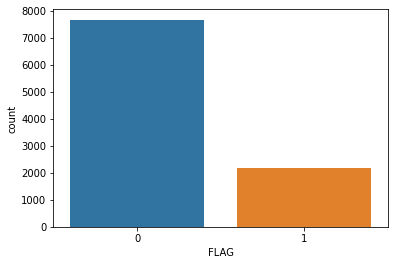

In [8]:
sns.countplot(x=data["FLAG"])

## Correlations

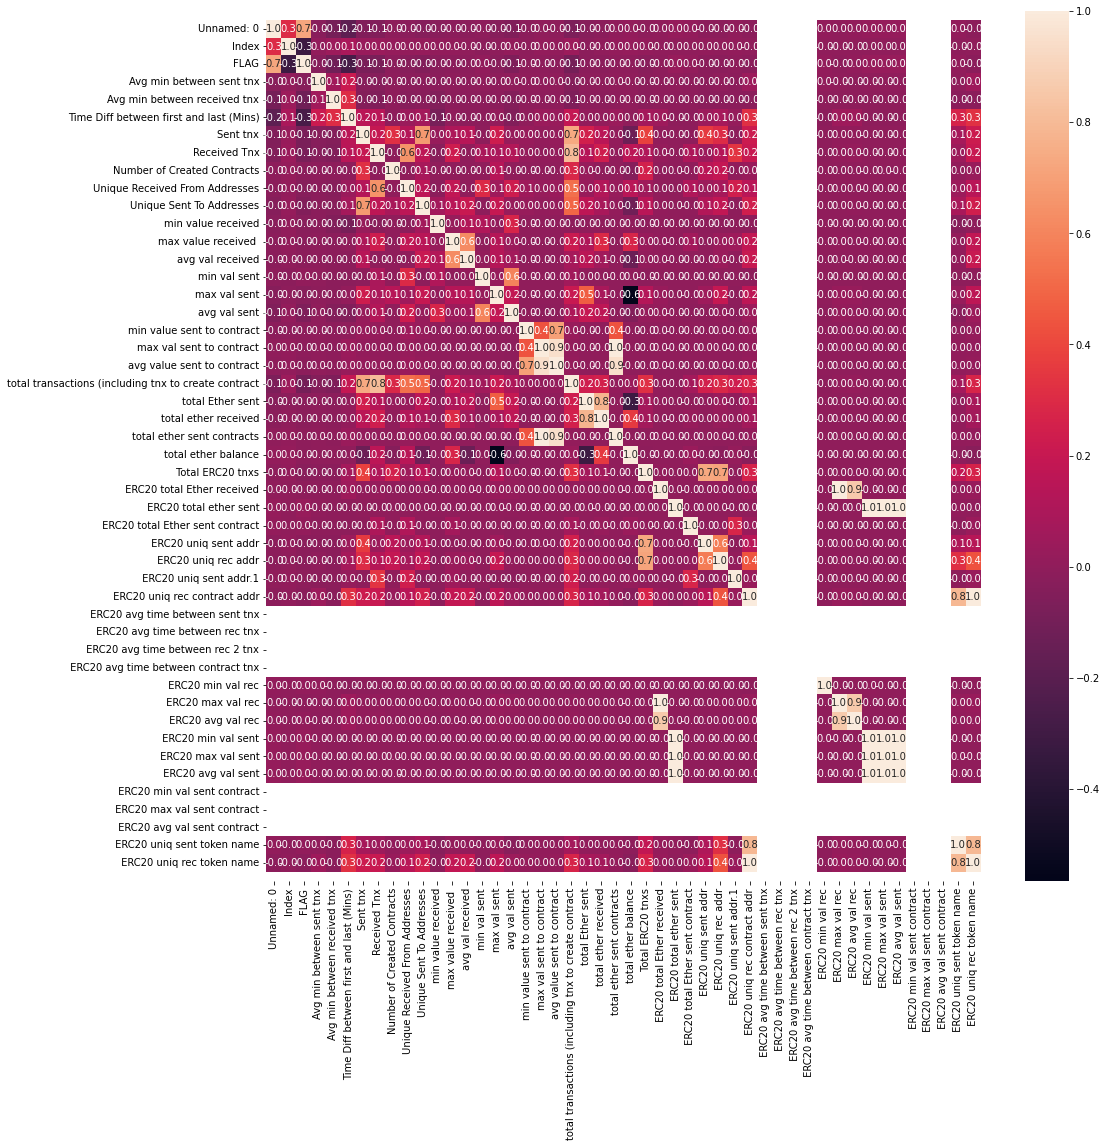

In [9]:
plt.figure(figsize=(16, 16))
ax = sns.heatmap(data.corr(), annot=True, fmt=".1f")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)
plt.show()

In [10]:
data.columns

Index(['Unnamed: 0', 'Index', 'Address', 'FLAG', 'Avg min between sent tnx',
       'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr',
       ' ERC20 avg time between sent tnx', ' ERC20 

### Drop attributes with catgorical values

In [11]:
data.drop(data[["Unnamed: 0", "Index", "Address", " ERC20 most sent token type", " ERC20_most_rec_token_type"]], axis=1, inplace=True)

In [12]:
data

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
0,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,...,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0
1,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,...,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0
2,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,...,4.428198e+02,65.189009,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0
3,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,...,1.141223e+04,1555.550174,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0
4,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,...,9.000000e+04,4934.232147,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,1,12635.10,631.39,58748.48,4,13,0,11,4,0.004082,...,1.337000e+00,0.668500,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,2.0
9837,1,0.00,0.00,0.00,0,0,0,0,0,0.000000,...,1.337000e+01,13.370000,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,1.0
9838,1,2499.44,2189.29,261601.88,67,43,0,31,44,0.001078,...,1.500000e+03,300.693901,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,5.0
9839,1,0.00,0.00,0.00,0,1,0,1,0,0.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Show attributes with null values

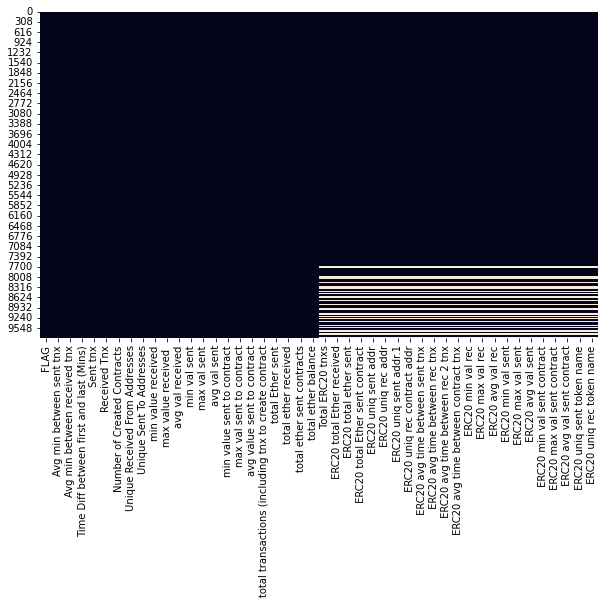

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(), cbar=False)
plt.show()

### Fill null values with the mean value of each attribute

In [14]:
data.fillna(data.mean(), inplace=True)

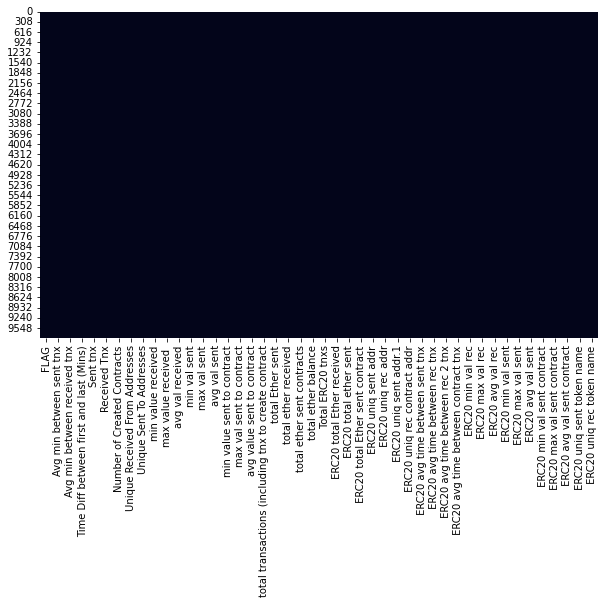

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(), cbar=False)
plt.show()

In [16]:
data.var()

FLAG                                                    1.724110e-01
Avg min between sent tnx                                4.616718e+08
Avg min between received tnx                            5.327656e+08
Time Diff between first and last (Mins)                 1.042889e+11
Sent tnx                                                5.733918e+05
Received Tnx                                            8.851734e+05
Number of Created Contracts                             2.000685e+04
Unique Received From Addresses                          8.917457e+04
Unique Sent To Addresses                                6.960121e+04
min value received                                      1.062298e+05
max value received                                      1.692294e+08
avg val received                                        8.323238e+06
min val sent                                            1.921264e+04
max val sent                                            4.394646e+07
avg val sent                      

### Drop attributes with zero variance
#### Values with zero variance have no effect in the predictions

In [17]:
no_var = data.var() == 0
data.drop(data.var()[no_var].index, axis = 1, inplace = True)

In [18]:
data

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name
0,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,...,0.00000,58.000000,0.000000,1.500000e+07,2.655861e+05,0.000000,1.683100e+07,2.717799e+05,39.000000,57.000000
1,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,...,0.00000,7.000000,0.000000,3.650000e+02,5.763262e+01,2.260809,2.260809e+00,2.260809e+00,1.000000,7.000000
2,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,...,0.00000,8.000000,0.000000,4.428198e+02,6.518901e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,8.000000
3,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,...,0.00000,11.000000,0.000000,1.141223e+04,1.555550e+03,100.000000,9.029231e+03,3.804077e+03,1.000000,11.000000
4,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,...,0.00000,27.000000,0.000000,9.000000e+04,4.934232e+03,0.000000,4.500000e+04,1.372666e+04,6.000000,27.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,1,12635.10,631.39,58748.48,4,13,0,11,4,0.004082,...,0.00000,2.000000,0.000000,1.337000e+00,6.685000e-01,0.000000,0.000000e+00,0.000000e+00,0.000000,2.000000
9837,1,0.00,0.00,0.00,0,0,0,0,0,0.000000,...,0.00000,1.000000,13.370000,1.337000e+01,1.337000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000
9838,1,2499.44,2189.29,261601.88,67,43,0,31,44,0.001078,...,0.00000,5.000000,0.000000,1.500000e+03,3.006939e+02,0.000000,0.000000e+00,0.000000e+00,0.000000,5.000000
9839,1,0.00,0.00,0.00,0,1,0,1,0,0.500000,...,0.00344,4.901909,485.614688,1.252524e+08,4.346203e+06,11741.257297,1.303594e+07,6.318389e+06,1.384931,4.826676


### Drop attributes with correlation over 0.85
#### High correlated values have usually redundant information

In [19]:
cor_matrix = data.corr().abs()

upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.85)]
print(to_drop)
drop = ["avg value sent to contract",
        "total ether sent contracts",
        " ERC20 max val rec",
        " ERC20 avg val rec",
        " ERC20 min val sent",
        " ERC20 max val sent",
        " ERC20 avg val sent",
        " ERC20 uniq rec token name"]
data.drop(drop, axis=1, inplace=True)

['avg value sent to contract', 'total ether sent contracts', ' ERC20 max val rec', ' ERC20 avg val rec', ' ERC20 min val sent', ' ERC20 max val sent', ' ERC20 avg val sent', ' ERC20 uniq rec token name']


In [20]:
data

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 uniq sent token name
0,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,...,265.000000,3.558854e+07,3.560317e+07,0.000000,30.000000,54.000000,0.00000,58.000000,0.000000,39.000000
1,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,...,8.000000,4.034283e+02,2.260809e+00,0.000000,1.000000,5.000000,0.00000,7.000000,0.000000,1.000000
2,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,...,8.000000,5.215121e+02,0.000000e+00,0.000000,0.000000,7.000000,0.00000,8.000000,0.000000,0.000000
3,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,...,14.000000,1.711105e+04,1.141223e+04,0.000000,2.000000,11.000000,0.00000,11.000000,0.000000,1.000000
4,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,...,42.000000,1.628297e+05,1.235399e+05,0.000000,4.000000,23.000000,0.00000,27.000000,0.000000,6.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,1,12635.10,631.39,58748.48,4,13,0,11,4,0.004082,...,2.000000,1.337000e+00,0.000000e+00,0.000000,0.000000,2.000000,0.00000,2.000000,0.000000,0.000000
9837,1,0.00,0.00,0.00,0,0,0,0,0,0.000000,...,1.000000,1.337000e+01,0.000000e+00,0.000000,0.000000,1.000000,0.00000,1.000000,13.370000,0.000000
9838,1,2499.44,2189.29,261601.88,67,43,0,31,44,0.001078,...,5.000000,1.503470e+03,0.000000e+00,0.000000,0.000000,5.000000,0.00000,5.000000,0.000000,0.000000
9839,1,0.00,0.00,0.00,0,1,0,1,0,0.500000,...,36.255659,1.296207e+08,1.386849e+07,110.939207,5.638038,7.598535,0.00344,4.901909,485.614688,1.384931


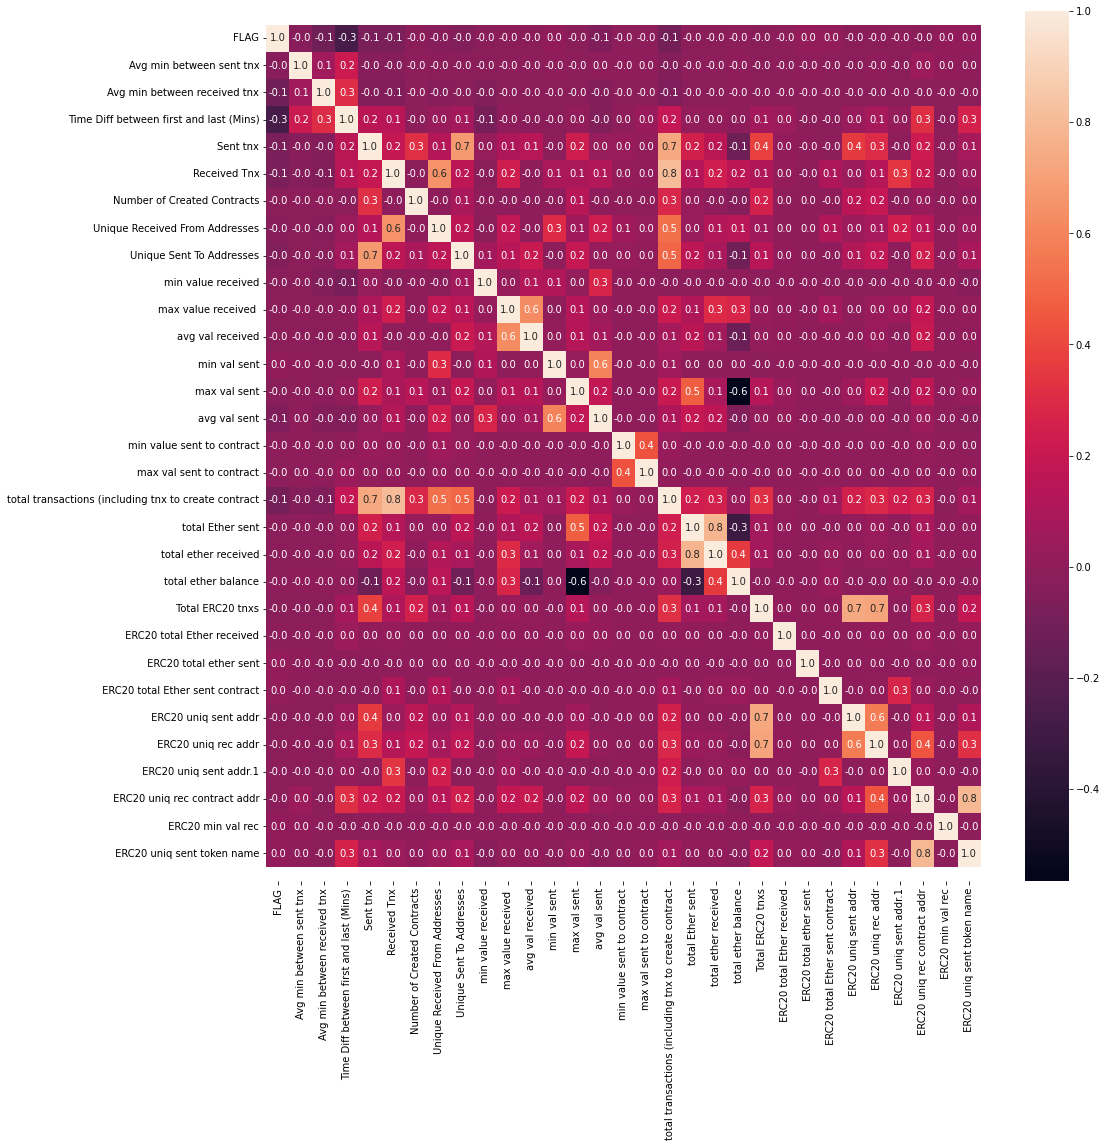

In [21]:
plt.figure(figsize=(16, 16))
ax = sns.heatmap(data.corr(), annot=True, fmt=".1f")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)
plt.show()

In [22]:
data

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 uniq sent token name
0,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,...,265.000000,3.558854e+07,3.560317e+07,0.000000,30.000000,54.000000,0.00000,58.000000,0.000000,39.000000
1,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,...,8.000000,4.034283e+02,2.260809e+00,0.000000,1.000000,5.000000,0.00000,7.000000,0.000000,1.000000
2,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,...,8.000000,5.215121e+02,0.000000e+00,0.000000,0.000000,7.000000,0.00000,8.000000,0.000000,0.000000
3,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,...,14.000000,1.711105e+04,1.141223e+04,0.000000,2.000000,11.000000,0.00000,11.000000,0.000000,1.000000
4,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,...,42.000000,1.628297e+05,1.235399e+05,0.000000,4.000000,23.000000,0.00000,27.000000,0.000000,6.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,1,12635.10,631.39,58748.48,4,13,0,11,4,0.004082,...,2.000000,1.337000e+00,0.000000e+00,0.000000,0.000000,2.000000,0.00000,2.000000,0.000000,0.000000
9837,1,0.00,0.00,0.00,0,0,0,0,0,0.000000,...,1.000000,1.337000e+01,0.000000e+00,0.000000,0.000000,1.000000,0.00000,1.000000,13.370000,0.000000
9838,1,2499.44,2189.29,261601.88,67,43,0,31,44,0.001078,...,5.000000,1.503470e+03,0.000000e+00,0.000000,0.000000,5.000000,0.00000,5.000000,0.000000,0.000000
9839,1,0.00,0.00,0.00,0,1,0,1,0,0.500000,...,36.255659,1.296207e+08,1.386849e+07,110.939207,5.638038,7.598535,0.00344,4.901909,485.614688,1.384931


## Normalize data

In [23]:
scaler = MinMaxScaler()
data_norm = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [24]:
data_norm

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 uniq sent token name
0,0.0,0.001962,0.002268,0.360530,0.0721,0.0089,0.0000,0.0040,0.012706,0.000000e+00,...,0.026497,3.558783e-05,3.178854e-04,0.000000,0.004558,0.012579,0.000000,0.074169,0.000000,0.183099
1,0.0,0.029536,0.006136,0.623173,0.0094,0.0008,0.0000,0.0005,0.001507,0.000000e+00,...,0.000800,4.034202e-10,2.018580e-11,0.000000,0.000152,0.001165,0.000000,0.008951,0.000000,0.004695
2,0.0,0.572163,0.005048,0.264330,0.0002,0.0010,0.0000,0.0010,0.000215,1.131190e-05,...,0.000800,5.215016e-10,0.000000e+00,0.000000,0.000000,0.001631,0.000000,0.010230,0.000000,0.000000
3,0.0,0.023751,0.032737,0.203368,0.0025,0.0009,0.0000,0.0007,0.001400,0.000000e+00,...,0.001400,1.711071e-08,1.018949e-07,0.000000,0.000304,0.002562,0.000000,0.014066,0.000000,0.004695
4,0.0,0.000085,0.022207,0.195652,0.4598,0.0020,0.0001,0.0007,0.002046,0.000000e+00,...,0.004200,1.628264e-07,1.103035e-06,0.000000,0.000608,0.005358,0.000000,0.034527,0.000000,0.028169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,1.0,0.029364,0.001309,0.030053,0.0004,0.0013,0.0000,0.0011,0.000431,4.082000e-07,...,0.000200,1.336973e-12,0.000000e+00,0.000000,0.000000,0.000466,0.000000,0.002558,0.000000,0.000000
9837,1.0,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.000000,0.000000e+00,...,0.000100,1.336973e-11,0.000000e+00,0.000000,0.000000,0.000233,0.000000,0.001279,0.000014,0.000000
9838,1.0,0.005809,0.004540,0.133821,0.0067,0.0043,0.0000,0.0031,0.004738,1.078000e-07,...,0.000500,1.503439e-09,0.000000e+00,0.000000,0.000000,0.001165,0.000000,0.006394,0.000000,0.000000
9839,1.0,0.000000,0.000000,0.000000,0.0000,0.0001,0.0000,0.0001,0.000000,5.000000e-05,...,0.003625,1.296181e-04,1.238258e-04,0.000267,0.000857,0.001770,0.001147,0.006268,0.000491,0.006502


## Split the dataset into 80% training and 20% testing

In [25]:
y = data.iloc[:, 0]
X = data.iloc[:, 1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Oversample the train data with SMOTE

In [26]:
print(f'Shape of the training before SMOTE: {X_train.shape, y_train.shape}')


x_train_sm, y_train_sm = SMOTE().fit_resample(X_train, y_train)
print(f'Shape of the training after SMOTE: {x_train_sm.shape, y_train_sm.shape}')

Shape of the training before SMOTE: ((7872, 30), (7872,))
Shape of the training after SMOTE: ((12316, 30), (12316,))


#### Check if oversampling worked with Counter

Target distribution before oversampling: Counter({0: 6158, 1: 1714})
Target distribution after oversampling: Counter({0: 6158, 1: 6158})


<AxesSubplot:xlabel='FLAG', ylabel='count'>

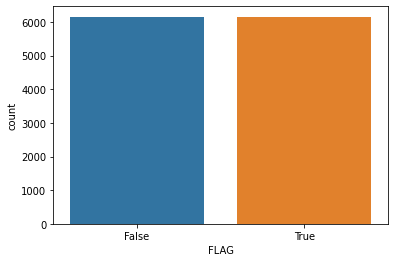

In [27]:
counter = Counter(y_train)
print(f"Target distribution before oversampling: {counter}")

counter = Counter(y_train_sm)
print(f"Target distribution after oversampling: {counter}")

sns.countplot(x=y_train_sm==1)

## Function for evaluating the models

In [ ]:
def model_eval(model, x_train, y_train, x_test, y_test):
    
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    
    print(classification_report(y_test, predictions))
    
    cm = confusion_matrix(y_test, predictions, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()
    
    f1_score(y_test, predictions, average="weighted") 
    
    probs = model.predict_proba(X_test)
    probs = probs[:, 1]

    auc = roc_auc_score(y_test, predictions)
    print("AUC: %.3f" % auc)

    fpr, tpr, thresholds = roc_curve(y_test, probs)

    model_name = type(model).__name__
    plt.plot([0, 1], [0, 1], linestyle='--', label="No skill")
    plt.plot(fpr, tpr, marker=".", label=model_name)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

## AdaBoost Classifier

In [63]:
num_trees = 50
seed=7
ada_clf = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)

Accuracy: 97.46%
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1504
           1       0.94      0.96      0.95       465

    accuracy                           0.97      1969
   macro avg       0.96      0.97      0.97      1969
weighted avg       0.97      0.97      0.97      1969



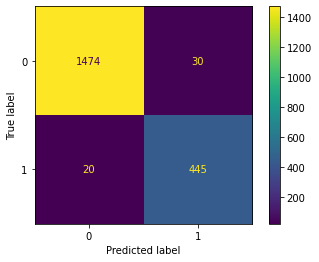

AUC: 0.969


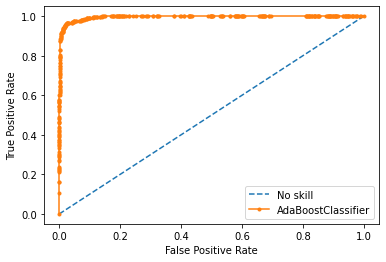

In [64]:
model_eval(ada_clf, x_train_sm, y_train_sm, X_test, y_test)

## RandomForest classifier

In [65]:
num_trees = 100
max_features = 3
rf_clf = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)

Accuracy: 98.12%
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1504
           1       0.98      0.94      0.96       465

    accuracy                           0.98      1969
   macro avg       0.98      0.97      0.97      1969
weighted avg       0.98      0.98      0.98      1969



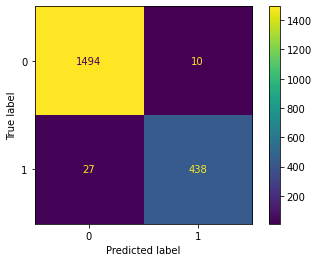

AUC: 0.968


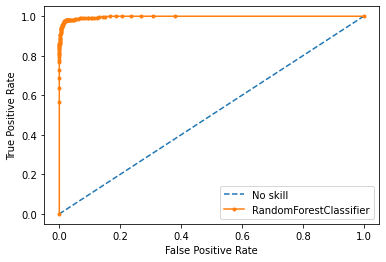

In [66]:
model_eval(rf_clf, x_train_sm, y_train_sm, X_test, y_test)

## Voting Classifier

In [67]:
estimators = []
model1 = LogisticRegression(solver='liblinear')
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC(gamma='scale', probability=True)
estimators.append(('svm', model3))

v_clf = VotingClassifier(estimators, voting="soft")

Accuracy: 95.58%
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1504
           1       0.90      0.91      0.91       465

    accuracy                           0.96      1969
   macro avg       0.94      0.94      0.94      1969
weighted avg       0.96      0.96      0.96      1969



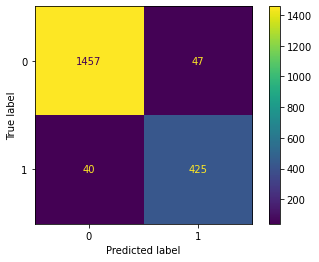

AUC: 0.941


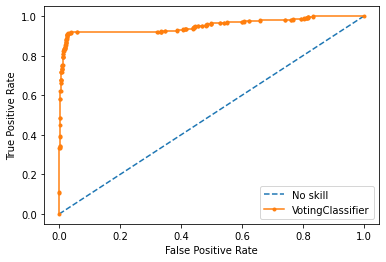

In [71]:
model_eval(v_clf, x_train_sm, y_train_sm, X_test, y_test)

# this model takes the most time to train

## XGBoost

In [75]:
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric="error")

Accuracy: 98.53%
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1504
           1       0.97      0.97      0.97       465

    accuracy                           0.99      1969
   macro avg       0.98      0.98      0.98      1969
weighted avg       0.99      0.99      0.99      1969



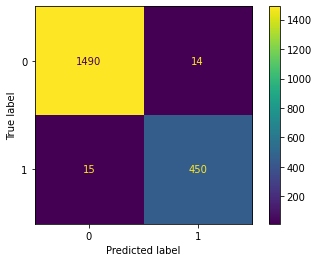

AUC: 0.979


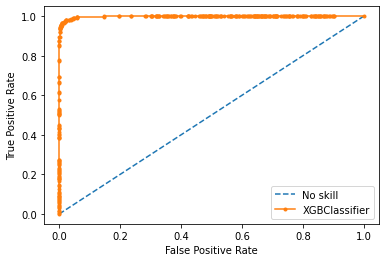

In [70]:
model_eval(xgb_clf, x_train_sm, y_train_sm, X_test, y_test)

### Plotting XGBoost Decision Tree

#### For the tree to be plotted, I had to install `graphviz` in both my virtual env and my linux system

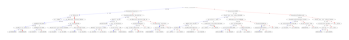

In [48]:
from matplotlib.pylab import rcParams
%matplotlib inline

## rcParams['figure.figsize'] = 80,50

plot_tree(xgb_clf)
plt.show()

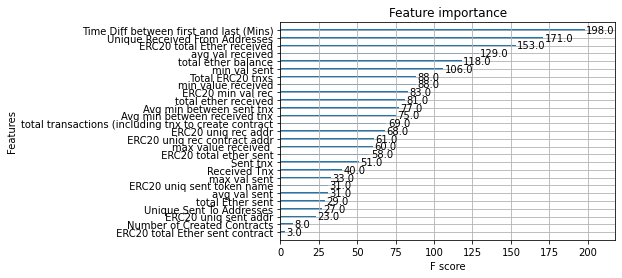

In [49]:
plot_importance(xgb_clf)
plt.show()

### In fraud detection we care about finding as many fraud transactions as possible. It is preferable to label as fraud, a non-fraud transaction, than to label a fraud transaction as non-fraud. We want our model to have the lowest false negatives (FN), thus high recall.
### In this notebook, XGBoost has the highest reacall and lowest FN

### Taking a look at ROC Curves and  roc-scores, we see that all the models have similar results, with the XGBoost model having the highest roc score.